# Reportar Producción Científica

Reportar producción científica para generar CV en español

In [4]:
import csv
#import pandas as pd
import datetime
!pip install pyparsing
import pyparsing
!pip install bibtexparser
import bibtexparser

import os
from os import path

!pip install numpy
import numpy as np
import matplotlib.pyplot as plt

You are using pip version 10.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 20.3.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Matplotlib is building the font cache; this may take a moment.


In [5]:
# Fechas del reporte
date_inicio = datetime.datetime(2008,8,1)
date_fin = datetime.datetime(2020,12,30)

# direccion de la base de datos
database_folder = '../../database/'


## Read databases

In [13]:
## Papers
with open(database_folder + 'myproducts.bib') as bibtex_file:
    bibtex_str = bibtex_file.read()

bib_database = bibtexparser.loads(bibtex_str)
#print(bib_database.entries)


# Teaching
teaching = []
with open(database_folder + 'teaching.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        teaching.append(dictio)

 
# Talks
talks = []
with open(database_folder + 'talks.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        talks.append(dictio)
        
# Developments
developments = []
with open(database_folder + 'developments.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        developments.append(dictio)
        
        
# Divulgacion
divulgacion = []
with open(database_folder + 'divulgacion.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        dictio = dict(row)
        divulgacion.append(dictio)
#print(divulgacion)


In [14]:
# Papers and thesis

count = 0
count_jcr = 0
count_cona = 0
count_proc = 0
count_mt = 0
count_preprint = 0
count_otros = 0
count_divul = 0

jcr_entries = []
proc_entries = []
mt_entries = []
cona_entries = []
preprint_entries = []
otros_entries = []
divul_entries = []

for entry in bib_database.entries:
    #print(entry)
    entry_date = datetime.datetime(int(entry['year']), int(entry['month']), 1)
    #if int(entry['year']) >= int(inicio['year']) and int(entry['year']) <= int(fin['year']):
    if date_inicio <= entry_date and entry_date <= date_fin:
        count = count +1
        #print(prod)
        
        if entry['ENTRYTYPE'] == 'article':
            if entry['note'] == 'jcr':
                jcr_entries.append(entry)
                count_jcr += 1
                
            elif entry['note'] == 'conacyt':
                cona_entries.append(entry)
                count_cona += 1
                
            elif entry['note'] == 'divulgacion':
                divul_entries.append(entry)
                count_divul += 1
                
            else:
                otros_entries.append(entry)
                count_otros += 1
            
        if entry['ENTRYTYPE'] == 'inproceedings':
            proc_entries.append(entry)
            count_proc += 1
            
        if entry['ENTRYTYPE'] == 'mastersthesis':
            mt_entries.append(entry)
            count_mt += 1
            
        if entry['ENTRYTYPE'] == 'unpublished':
            preprint_entries.append(entry)
            count_preprint += 1
        
print(f"{count} products found")
print(f"{count_jcr} JCR products found")
print(f"{count_proc} Proccedings products found")
print(f"{count_mt} Master Thesis found")
print(f"{count_cona} conacyt articles")
print(f"{count_cona} conacyt articles")
print(f"{count_preprint} preprints")

28 products found
10 JCR products found
10 Proccedings products found
4 Master Thesis found
1 conacyt articles
1 conacyt articles
1 preprints


In [15]:
# list products between dates
#count_activ = 0

#activities_dv = []
#for activ in divulgacion:
    #print(toDate(subject['Inicio']).year)
#    if date_inicio <= toDate(activ['Date']) and date_fin >= toDate(activ['Date']):
#        count_activ += 1
#        activities_dv.append(activ)
        
#print(f"{count_activ} actividades de divulación o vinculación")


In [16]:
# Verificar que existe el folder
if not path.exists('text'):
    os.mkdir('text')
    
#print ("directory exists:" + str(path.exists('text')))
#os.mkdir(path)

## Publicaciones

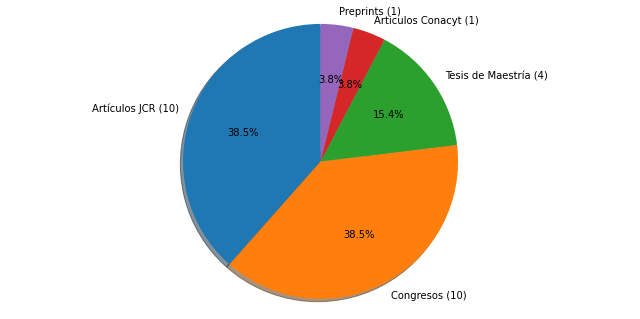

In [17]:
labels = []
publicaciones = []

# Graficar los productos
if count_jcr > 0:
    publicaciones.append(count_jcr)
    labels.append(f"Artículos JCR ({str(count_jcr)})")
    
if count_proc > 0:
    publicaciones.append(count_proc)
    labels.append(f"Congresos ({str(count_proc)})")

if count_mt > 0:
    publicaciones.append(count_mt)
    labels.append(f"Tesis de Maestría ({str(count_mt)})")
    
if count_cona > 0:
    publicaciones.append(count_cona)
    labels.append(f"Articulos Conacyt ({str(count_cona)})")
    
if count_preprint > 0:
    publicaciones.append(count_preprint)
    labels.append(f"Preprints ({str(count_preprint)})")
    
#if count_otros > 0:
#publicaciones.append(count_otros)
#labels.append("Otros")

fig, ax1 = plt.subplots(figsize=(9, 4.5), subplot_kw=dict(aspect="equal"))

ax1.pie(publicaciones, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig("text/products.pdf", format='pdf')
plt.show()


In [18]:
# Crear un archivo .tex para la producción científica
# Articulos JCR

# write data in a file. 
file1 = open("text/jcr_journals.tex","w") 
#L = ["This is Delhi \n","This is Paris \n","This is London \n"]  
  
# \n is placed to indicate EOL (End of Line) 
if count_jcr > 0:
    file1.write("\\begin{itemize} \n") 
    
    jcr_entries = sorted(jcr_entries, key = lambda i: i['year'], reverse = True)
    
    for entry in jcr_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']},\\textit{{ {entry['journal']},}} ({entry['year']}), I.F. {entry['if']} \n") 
                    
    file1.write("\\end{itemize} \n")                     
                                        
file1.close() #to change file access modes 


In [19]:
# CONACYT

# write data in a file. 
file1 = open("text/conacyt_journals.tex","w") 
#L = ["This is Delhi \n","This is Paris \n","This is London \n"]    
                    
if count_cona > 0:
    file1.write("\\begin{itemize} \n") 
    
    cona_entries = sorted(cona_entries, key = lambda i: i['year'], reverse = True)
    
    for entry in cona_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']},\\textit{{ {entry['journal']},}} ({entry['year']}) \n") 
                    
    file1.write("\\end{itemize} \n")                  
                                        
file1.close() #to change file access modes 

In [20]:
# CONFERENCIAS

# write data in a file. 
file1 = open("text/proceedings.tex","w") 
                                      
if count_proc > 0:
   file1.write("\\begin{itemize} \n") 
                    
   proc_entries = sorted(proc_entries, key = lambda i: i['year'], reverse = True)
                    
   for entry in proc_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']}, \\textit{{ {entry['booktitle']},}} {entry['year']} \n")        

   file1.write("\\end{itemize} \n")                     
                                        
file1.close() #to change file access modes 

## Estudiantes

Crear un archivo tex para la formación de recursos humanos

In [21]:
# MAESTRIA

# write data in a file. 
file1 = open("text/master_students.tex","w")

#file1.write("\\item{\\bf GRADUATED MASTER STUDENTS: }\n")
    
if count_mt > 0:
    #file1.write("Tesis de maestría dirigidas: \n")
    file1.write("\\begin{itemize} \n")
    
    mt_entries = sorted(mt_entries, key = lambda i: i['year'], reverse = True)
                    
    for entry in mt_entries:
        file1.write(f"\\item {entry['author']}, \\textit{{ {entry['title']},}} {entry['year']} \n")        

    file1.write("\\end{itemize} \n") 
                    
file1.close() #to change file access modes 

## Clases

In [22]:
# Teaching
def toDate(cadena):
    return datetime.datetime.strptime(cadena, '%Y/%m/%d')

# list products between dates
count_sub = 0
total_hours = 0

for subject in teaching:
    #print(toDate(subject['Inicio']).year)
    if date_inicio <= toDate(subject['Inicio']) and date_fin >= toDate(subject['Fin']):
        count_sub += 1
        total_hours += int(subject['Horas'])     
        
print(f"{count_sub} materias impartidas")
print(f"{total_hours} horas impartidas")


# write data in a file. 
file1 = open("text/teaching.tex","w")

#file1.write("\\item{\\bf GRADUATED MASTER STUDENTS: }\n")
    
if len(teaching) > 0:
    #teaching = sorted(teaching, key = lambda i: i['year'], reverse = True)
    
    file1.write("\\begin{itemize} \n")
                    
    for entry in teaching:
        file1.write(f"\\item {entry['Inicio']}, \\textit{{ {entry['Nombre']},}} nivel {entry['Nivel']}, {entry['Horas']} horas. \n")        

    file1.write("\\end{itemize} \n") 
                    
file1.close() #to change file access modes 

20 materias impartidas
1188 horas impartidas


## Desarrollos tecnológicos

In [23]:
# Desarrollos tecnológicos

file1 = open("text/developments.tex","w")

if len(developments) > 0:
    #teaching = sorted(teaching, key = lambda i: i['year'], reverse = True)
    file1.write("\\begin{itemize} \n")
                    
    for entry in developments:
        file1.write(f"\\item {entry['Date']}, \\textit{{ {entry['Name']},}} {entry['User']}, {entry['License']}, {entry['Validation']} \n")        

    file1.write("\\end{itemize} \n") 
                    
file1.close() #to change file access modes 

## Vinculación y divulgación

In [27]:
# Talks

# write data in a file. 
file1 = open("text/talks.tex","w")

if len(talks) > 0:
    file1.write("\\begin{itemize} \n") 
    
    talks = sorted(talks, key = lambda i: i['year'], reverse = True)
        
    for entry in talks:
        if entry['Type'] == 'platica':
            file1.write(f"\\item {entry['Date']}, {entry['Title']}, en \\textit{{ {entry['Event']},}} {entry['Place']} \n")            

    file1.write("\\end{itemize} \n") 
                        
file1.close() #to change file access modes 

In [28]:
# Workshops

# write data in a file. 
file1 = open("text/workshop.tex","w")

if len(talks) > 0:
    file1.write("\\begin{itemize} \n") 
    
    talks = sorted(talks, key = lambda i: i['year'], reverse = True)
        
    for entry in talks:
        if entry['Type'] == 'taller':
            file1.write(f"\\item {entry['Date']}, {entry['Title']}, en \\textit{{ {entry['Event']},}} {entry['Place']} \n")            

    file1.write("\\end{itemize} \n") 
                        
file1.close() #to change file access modes 

In [25]:
# Crear un archivo tex para las actividades de divulgacion

# write data in a file. 
#file1 = open("text/divulgacion.tex","w")

print(activities_dv)


if count_proc > 0:
    file1.write(" Artículos de divulgación de la ciencia publicados/aceptados:")
    file1.write("\\begin{itemize} \n") 
                    
    for entry in divul_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']}, {entry['journal']}, {entry['year']} \n")            

    file1.write("\\end{itemize} \n") 

if count_activ > 0:
    file1.write("Actividades de vinculación o divulgación de la ciencia: \n")
    file1.write("\\begin{itemize} \n") 
        
    for entry in activities_dv:
        if entry['Type'] == 'platica':
            file1.write(f"\\item Plática impartida en el/la {entry['Event']} con el título {entry['Title']}, {entry['Place']}, {entry['Date']} \n")
        elif entry['Type'] == 'torneo':
            file1.write(f"\\item Participación en el/la {entry['Event']}, {entry['Date']} \n")        
        else:
            file1.write(f"\\item Participación en el/la {entry['Event']}, {entry['Date']} \n")             

    file1.write("\\end{itemize} \n") 
                    
                    
#file1.writelines(L) 
#file1.close() #to change file access modes 

NameError: name 'activities_dv' is not defined

### Preprints

In [29]:
# Crear un archivo .tex para los preprints
  
if count_preprint > 0:
    # write data in a file. 
    file1 = open("text/preprints.tex","w") 

    #file1.write("\n Preprints:")
    file1.write("\\begin{itemize} \n") 
    
    for entry in preprint_entries:
        file1.write(f"\\item {entry['author']}, {entry['title']}, {entry['journal']}, {entry['year']} \n") 
                    
    file1.write("\\end{itemize} \n") 
                    
    file1.close() #to change file access modes 